In [11]:
import sklearn
print(sklearn.__version__)

1.2.2


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# read data from url
df = pd.read_csv('https://github.com/pvateekul/2110446_DSDE_2023s2/blob/main/DataSet/hed2020_dataset.csv?raw=true')

df.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [3]:
# choose edible mushroom only
df = df[df['label'] == 'e']

df.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0
5,6,e,x,y,t,a,f,c,b,e,...,o,p,k,n,g,2.0,1.0,1.0,1.0,1.0
6,7,e,b,s,t,a,f,c,b,e,...,o,p,k,n,m,3.0,2.0,1.0,1.0,1.0


In [4]:
# only 'cap-color-rate','stalk-color-above-ring-rate' is used
df = df[['cap-color-rate','stalk-color-above-ring-rate']]

df.head()

,cap-color-rate,stalk-color-above-ring-rate
1,2.0,1.0
2,3.0,1.0
4,4.0,1.0
5,2.0,1.0
6,3.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 1 to 5823
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cap-color-rate               2098 non-null   float64
 1   stalk-color-above-ring-rate  2076 non-null   float64
dtypes: float64(2)
memory usage: 49.3 KB


In [6]:
#  Fill missing with mean and Standardize variables with Standard Scaler
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler = StandardScaler()

processed_df = meanImputer.fit_transform(df)
processed_df = scaler.fit_transform(processed_df)

pd.DataFrame(processed_df, columns=['cap-color-rate','stalk-color-above-ring-rate']).describe()

,cap-color-rate,stalk-color-above-ring-rate
count,2.104000e+03,2.104000e+03
mean,-1.621010e-16,1.350842e-17
std,1.000238e+00,1.000238e+00
min,-1.235830e+00,-7.476080e-01
25%,-1.235830e+00,-7.476080e-01
50%,2.666451e-01,-2.175417e-01
75%,7.674701e-01,3.125247e-01
max,3.271595e+00,2.432790e+00


In [7]:
# K-means clustering with 5 clusters and seed = 2020.
kmeans = KMeans(n_clusters=5, random_state=2020)

kmeans.fit(processed_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=2020)

In [8]:
# show centroids
pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

,cap-color-rate,stalk-color-above-ring-rate
0,0.413618,-0.375369
1,-1.235830,2.306584
2,-1.229062,-0.293547
3,2.505966,-0.747608
4,1.209313,1.902724


In [9]:
# Convert the centroid value to the original scale.
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns)

centroids

,cap-color-rate,stalk-color-above-ring-rate
0,4.293462,1.702251
1,1.000000,6.761905
2,1.013514,1.856611
3,8.471264,1.000000
4,5.882230,6.000000


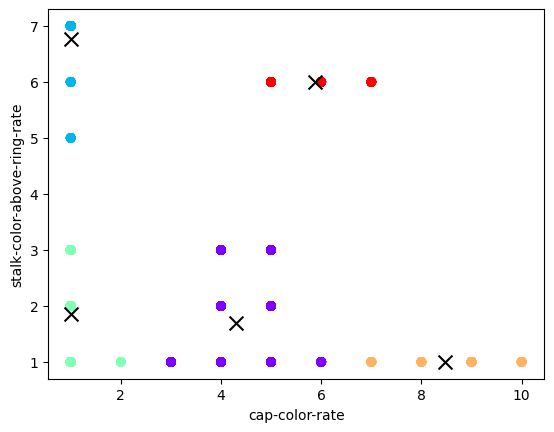

In [10]:
# plot the centroids
plt.scatter(df['cap-color-rate'], df['stalk-color-above-ring-rate'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(centroids['cap-color-rate'], centroids['stalk-color-above-ring-rate'], marker='x', s=100, c='black')
plt.xlabel('cap-color-rate')
plt.ylabel('stalk-color-above-ring-rate')
plt.show()